Chapter 4 figures, etc.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize)

In [3]:
Default = load_data("Default")
Default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


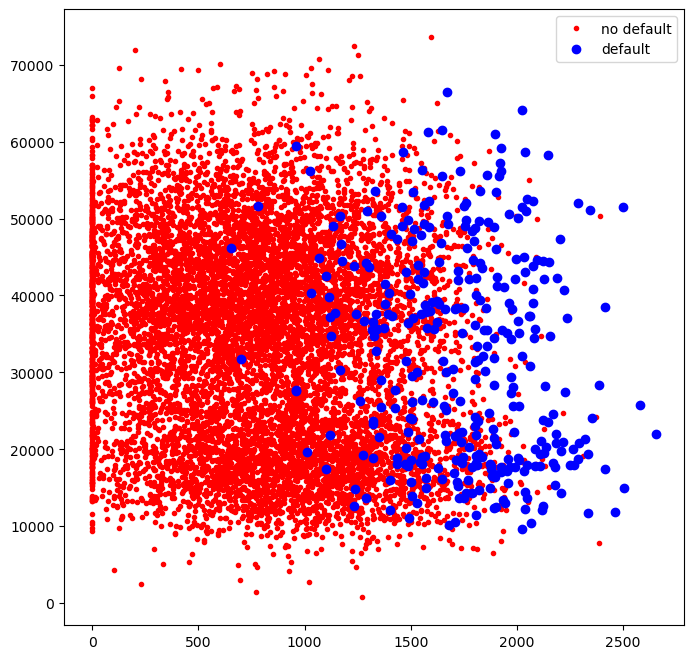

In [4]:
fig, ax = plt.subplots(figsize=(8,8))
indx_default = Default['default']=='Yes'
ax.plot(Default[~indx_default]['balance'],Default[~indx_default]['income'],'r.',label='no default');
ax.plot(Default[indx_default]['balance'],Default[indx_default]['income'],'bo',label='default');
ax.legend();

<Axes: title={'center': 'income'}, xlabel='default'>

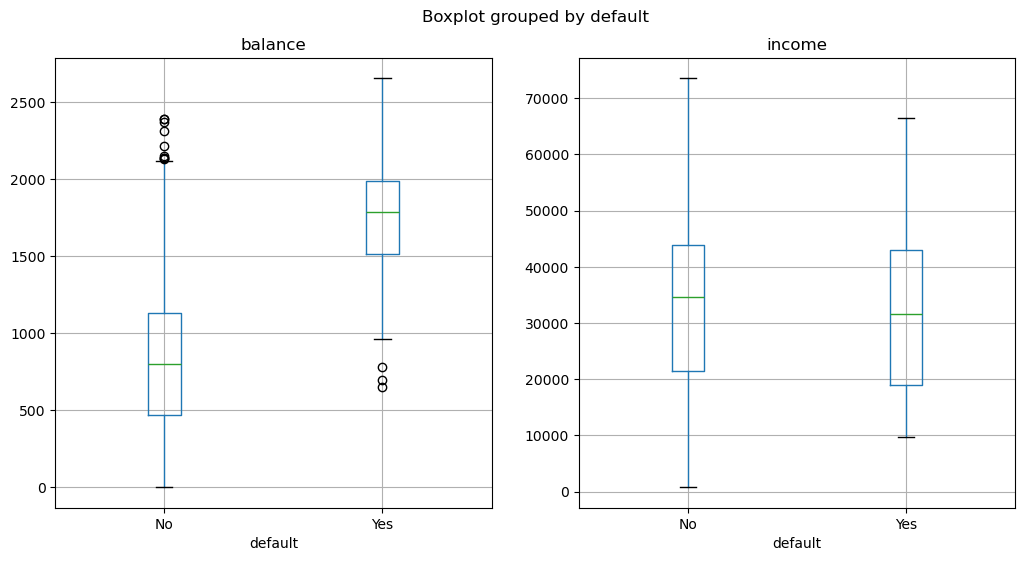

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(12,6))
Default.boxplot('balance',by='default',ax=ax[0])
Default.boxplot('income',by='default',ax=ax[1])

In [6]:
Default.default.replace(('Yes', 'No'), (1, 0), inplace=True)
y = Default['default']
X = MS(['balance']).fit_transform(Default)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-0.0752,0.003000,-22.416,0.0
balance,0.0001,0.000003,37.374,0.0


In [7]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

/home/jake/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


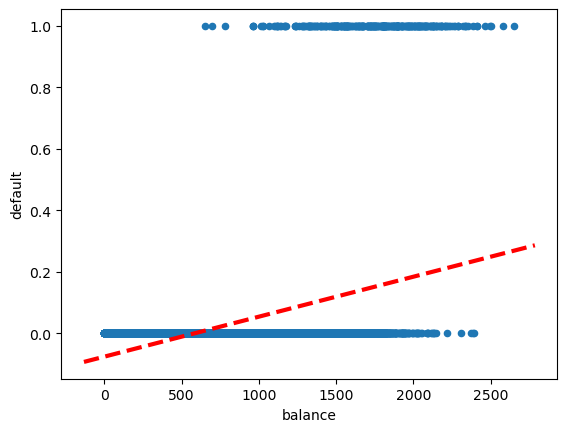

In [8]:
ax = Default.plot.scatter('balance', 'default')
abline(ax,
       results.params[0],
       results.params[1],
       'r--',
       linewidth=3)

In [9]:
Default.default.replace(('Yes', 'No'), (1, 0), inplace=True)
y = Default['default']
X = MS(['balance']).fit_transform(Default)
# using sm.GLM with family = sm.families.Binomial() does logistic regression.
model = sm.GLM(y, X,family=sm.families.Binomial())
results = model.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-10.6513,0.361,-29.491,0.0
balance,0.0055,0.000,24.952,0.0


In [10]:
def ablogistic(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    xgrid = np.linspace(xlim[0],xlim[1])
    ygrid = np.divide(np.exp(m * xgrid + b),(1+np.exp(m * xgrid + b)))
    ax.plot(xgrid, ygrid, *args, **kwargs)

/home/jake/.local/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


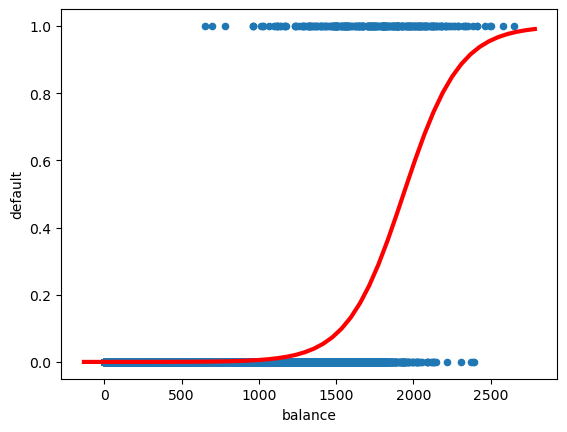

In [11]:
ax = Default.plot.scatter('balance', 'default')
ablogistic(ax,
       results.params[0],
       results.params[1],
       'r-',
       linewidth=3)

In [12]:
def prob_of_default(x,b,m):
    return np.divide(np.exp(np.dot(m,x) + b),(1+np.exp(np.dot(m,x) + b)))

x=1000
p=prob_of_default(x,results.params[0],results.params[1])
print('Probability of default with a balance of $',x,'is',p)
x=2000
p=prob_of_default(x,results.params[0],results.params[1])
print('Probability of default with a balance of $',x,'is',p)

Probability of default with a balance of $ 1000 is 0.005752145068073732
Probability of default with a balance of $ 2000 is 0.5857693698313349


In [13]:
# Add a variable for whether the person is a student or not
Default.student.replace(('Yes', 'No'), (1, 0), inplace=True)
y = Default['default']
X = MS(['student']).fit_transform(Default)
# using sm.GLM with family = sm.families.Binomial() does logistic regression.
model = sm.GLM(y, X,family=sm.families.Binomial())
results = model.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-3.5041,0.071,-49.554,0.0
student,0.4049,0.115,3.520,0.0


In [14]:
# Compare probability of default for a student versus a non-student
x=0
p=prob_of_default(x,results.params[0],results.params[1])
print('Probability of default for a non-student is ',p)
x=1
p=prob_of_default(x,results.params[0],results.params[1])
print('Probability of default for a student is ',p)

Probability of default for a non-student is  0.029195011338246386
Probability of default for a student is  0.043138586956519356


In [15]:
y = Default['default']
X = MS(['balance','income','student']).fit_transform(Default)
# using sm.GLM with family = sm.families.Binomial() does logistic regression.
model = sm.GLM(y, X,family=sm.families.Binomial())
results = model.fit()
summarize(results)

,coef,std err,z,P>|z|
intercept,-10.869000,0.492000,-22.079,0.000
balance,0.005700,0.000000,24.737,0.000
income,0.000003,0.000008,0.370,0.712
student,-0.646800,0.236000,-2.738,0.006


In [16]:
x=[1500,40000,1]
p=prob_of_default(x,results.params[0],results.params[1:])
print('Probability of default for a student with a balance of ',x[0],' and an income of ',x[1],' is ',p)
x=[1500,40000,0]
p=prob_of_default(x,results.params[0],results.params[1:])
print('Probability of default for a non-student with a balance of ',x[0],' and an income of ',x[1],' is ',p)

Probability of default for a student with a balance of  1500  and an income of  40000  is  0.057881943242960976
Probability of default for a non-student with a balance of  1500  and an income of  40000  is  0.10499192395408151


Linear Discriminant Analysis (My Attempt)

In [17]:
#names = ['balance','income']
names = ['student','balance']
# This is incorrect, as the covariance needs to be weighted by the 
indx_default = Default['default']==1 # index for default
pi_default = Default['default'].sum()/len(Default) # proportion of defaults, this is the pi_k
pi_nodefault = 1-pi_default # proportion of non-defaults
mu_default = Default[names][indx_default][names].mean() # mean of the default group
mu_nodefault = Default[names][~indx_default][names].mean() # mean of the non-default group
Sigma_default = Default[names][indx_default].cov() # covariance of the default group
Sigma_nodefault = Default[names][~indx_default].cov() # covariance of the non-default group
n = len(Default) # number of observations
k_def = indx_default.sum() # number of defaults
k_nodef = n-k_def # number of non-defaults
# You've got to be sure to use the correct covariance formula!!
Sigma = 1/(n-2)*((k_def-1)*Sigma_default+(k_nodef-1)*Sigma_nodefault) # pooled covariance (weighted by the number of observations in each group)

In [18]:
23/9667

0.0023792283024723286

In [19]:
from ISLP import confusion_table

def default_fun(x):
    y = np.linalg.solve(Sigma,mu_default)
    delta_default = np.dot(x,y) -0.5*np.dot(mu_default,y)+np.log(pi_default)

    y = np.linalg.solve(Sigma,mu_nodefault)
    delta_nodefault = np.dot(x,y) -0.5*np.dot(mu_nodefault,y)+np.log(pi_nodefault)
    
    return delta_default > delta_nodefault

lda_pred = Default[names].apply(default_fun, axis=1)
confusion_table(lda_pred,Default['default'])

Truth,0,1
Predicted,,
0,9644,252
1,23,81


Linear Discriminant Analysis

In [20]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)

In [21]:
lda = LDA(store_covariance = True)
lda.fit(Default[['student','balance']],Default['default'])

LinearDiscriminantAnalysis(store_covariance=True)

In [22]:
# These are commands found in the lab for Chapter 4. I am just testing them out here.
lda.means_
lda.classes_
lda.priors_
lda.scalings_

array([[-0.2490595],
       [ 0.0022444]])

In [23]:
lda_pred = lda.predict(Default[['student','balance']])
confusion_table(lda_pred,Default['default'])

Truth,0,1
Predicted,,
0,9644,252
1,23,81


In [24]:
lda_prob = lda.predict_proba(Default[['student','balance']])
np.all(
        np.where(lda_prob[:,1]>=0.5,1,0)==lda_pred
      )
lda_prob

array([[9.96868025e-01, 3.13197512e-03],
       [9.97192469e-01, 2.80753130e-03],
       [9.84396954e-01, 1.56030463e-02],
       ...,
       [9.94609931e-01, 5.39006860e-03],
       [8.59816046e-01, 1.40183954e-01],
       [9.99844966e-01, 1.55033864e-04]])

In [29]:
lda_pred2 = lda_prob[:,1]>=0.2
lda_pred2.astype(int) # 1*lda_pred2 also works
confusion_table(lda_pred2,Default['default'])

Truth,0,1
Predicted,,
0,9432,138
1,235,195


In [27]:
# precision and recall
from sklearn.metrics import precision_score, recall_score
precision_score(Default['default'],lda_pred), recall_score(Default['default'],lda_pred)

(0.7788461538461539, 0.24324324324324326)